In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d vivmankar/asian-vs-african-elephant-image-classification

100% 51.8M/51.8M [00:03<00:00, 20.7MB/s]
100% 51.8M/51.8M [00:03<00:00, 14.7MB/s]


In [ ]:
import zipfile

zip_data = zipfile.ZipFile('/content/asian-vs-african-elephant-image-classification.zip')
zip_data.extractall('/content/')
zip_data.close()

#Importing Libraries


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

import numpy as np
import matplotlib.pyplot as plt
import cv2

array([[[ 66,  87,  72],
        [ 77, 100,  85],
        [ 63,  90,  74],
        ...,
        [103, 138, 128],
        [114, 151, 141],
        [129, 166, 156]],

       [[ 69,  90,  75],
        [100, 123, 108],
        [ 41,  68,  52],
        ...,
        [114, 149, 139],
        [126, 161, 151],
        [109, 146, 136]],

       [[ 79, 102,  87],
        [ 88, 114,  98],
        [ 27,  54,  38],
        ...,
        [ 83, 119, 107],
        [ 91, 127, 115],
        [ 93, 129, 117]],

       ...,

       [[ 95, 138, 141],
        [100, 143, 146],
        [ 87, 133, 134],
        ...,
        [159, 193, 199],
        [135, 170, 174],
        [135, 170, 173]],

       [[111, 155, 156],
        [113, 157, 156],
        [ 95, 142, 140],
        ...,
        [140, 176, 184],
        [120, 156, 162],
        [138, 175, 179]],

       [[124, 168, 167],
        [121, 165, 164],
        [118, 165, 162],
        ...,
        [136, 172, 180],
        [117, 153, 161],
        [132, 168, 174]]], dtype=uint8)
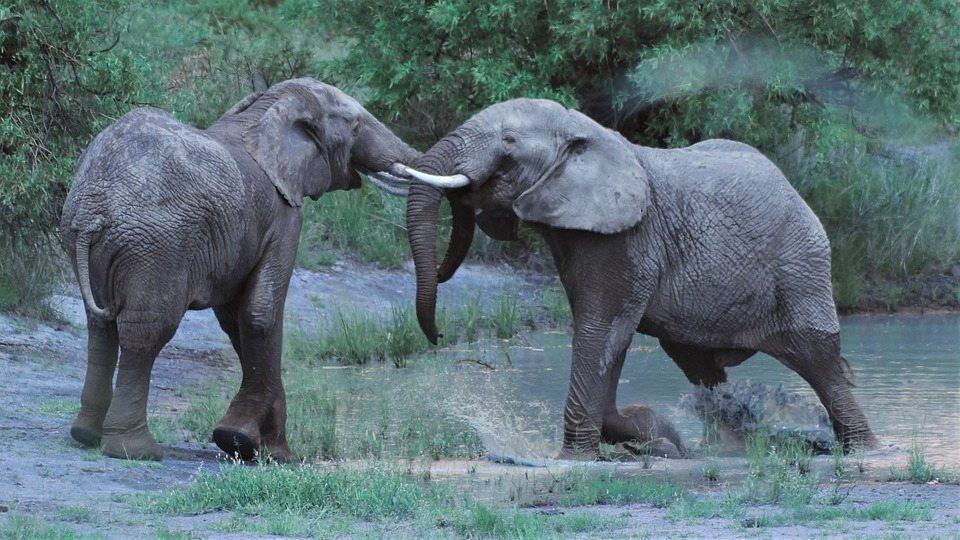

In [ ]:
img = cv2.imread('/content/dataset/test/African/af_te13.jpg')
img

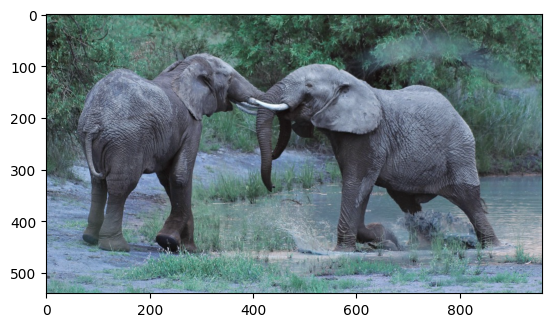

In [ ]:
plt.imshow(img)

In [ ]:
img.shape

(540, 960, 3)

##Generating Dataset

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(

                  directory = '/content/dataset/train',
                  labels='inferred',
                  label_mode='int',
                  batch_size=32,
                  image_size=(256, 256),
              )

test_ds = tf.keras.utils.image_dataset_from_directory(

                  directory = '/content/dataset/test',
                  labels='inferred',
                  label_mode='int',
                  batch_size=32,
                  image_size=(256, 256),
              )

Found 840 files belonging to 2 classes.
Found 188 files belonging to 2 classes.


In [ ]:
print(f'Number of batches: {840//32}')

Number of batches: 26


In [ ]:
def scale_down_px(image, label):

  image = tf.cast(image/255, tf.float32)

  return image, label

In [ ]:
train_ds = train_ds.map(scale_down_px)
test_ds = test_ds.map(scale_down_px)

In [ ]:
train_ds

<_MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

##Creating CNN Architecture or Model

In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='relu'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')

In [ ]:
history = model.fit(train_ds, validation_data=test_ds, epochs=11)

Epoch 1/11
27/27 [==============================] - 6s 185ms/step - loss: 7.6246 - accuracy: 0.5000 - val_loss: 7.8680 - val_accuracy: 0.4840
Epoch 2/11
27/27 [==============================] - 4s 133ms/step - loss: 7.6246 - accuracy: 0.5000 - val_loss: 7.8680 - val_accuracy: 0.4840
Epoch 3/11
27/27 [==============================] - 5s 162ms/step - loss: 7.6246 - accuracy: 0.5000 - val_loss: 7.8680 - val_accuracy: 0.4840
Epoch 4/11
27/27 [==============================] - 4s 149ms/step - loss: 7.6246 - accuracy: 0.5000 - val_loss: 7.8680 - val_accuracy: 0.4840
Epoch 5/11
27/27 [==============================] - 5s 161ms/step - loss: 7.6246 - accuracy: 0.5000 - val_loss: 7.8680 - val_accuracy: 0.4840
Epoch 6/11
27/27 [==============================] - 5s 163ms/step - loss: 7.6246 - accuracy: 0.5000 - val_loss: 7.8680 - val_accuracy: 0.4840
Epoch 7/11
27/27 [==============================] - 4s 132ms/step - loss: 7.6246 - accuracy: 0.5000 - val_loss: 7.8680 - val_accuracy: 0.4840
Epoch 

##Training and Validation Accuracy Graph


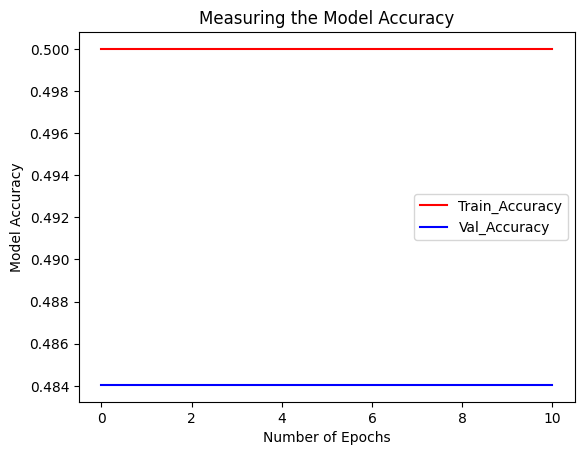

In [ ]:
plt.plot(history.history['accuracy'],color='r',label='Train_Accuracy')
plt.plot(history.history['val_accuracy'],color='b',label='Val_Accuracy')
plt.title('Measuring the Model Accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Model Accuracy')
plt.legend()
plt.show()

##Training and Validation Loss

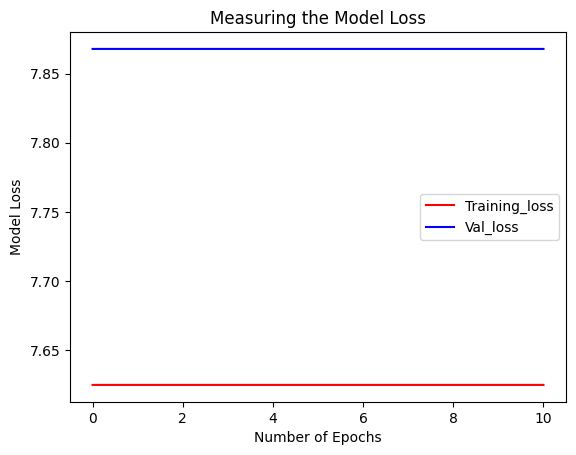

In [ ]:
plt.plot(history.history['loss'],color='r',label='Training_loss')
plt.plot(history.history['val_loss'],color='b',label='Val_loss')
plt.title('Measuring the Model Loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Model Loss')
plt.legend()
plt.show()

#Improving the model

In [ ]:
from keras.layers import BatchNormalization, Dropout

In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')

In [ ]:
history = model.fit(train_ds, validation_data = test_ds, epochs=11)

Epoch 1/11
27/27 [==============================] - 6s 197ms/step - loss: 4.2085 - accuracy: 0.5310 - val_loss: 1.5210 - val_accuracy: 0.4894
Epoch 2/11
27/27 [==============================] - 5s 190ms/step - loss: 3.5923 - accuracy: 0.5250 - val_loss: 1.5058 - val_accuracy: 0.5053
Epoch 3/11
27/27 [==============================] - 4s 155ms/step - loss: 2.4095 - accuracy: 0.5690 - val_loss: 2.3961 - val_accuracy: 0.5372
Epoch 4/11
27/27 [==============================] - 5s 185ms/step - loss: 1.8126 - accuracy: 0.5821 - val_loss: 4.7650 - val_accuracy: 0.5160
Epoch 5/11
27/27 [==============================] - 5s 186ms/step - loss: 1.6342 - accuracy: 0.5810 - val_loss: 2.7234 - val_accuracy: 0.5000
Epoch 6/11
27/27 [==============================] - 6s 193ms/step - loss: 1.1513 - accuracy: 0.5929 - val_loss: 1.2879 - val_accuracy: 0.5213
Epoch 7/11
27/27 [==============================] - 4s 152ms/step - loss: 1.1142 - accuracy: 0.6167 - val_loss: 1.5109 - val_accuracy: 0.6117
Epoch 

##Training and Validation Accuracy Graph

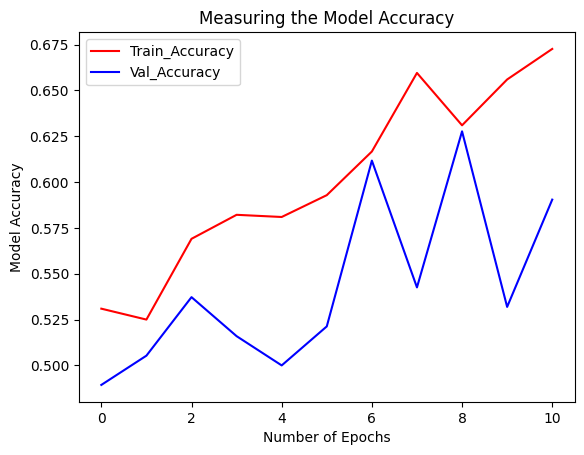

In [ ]:
plt.plot(history.history['accuracy'],color='r',label='Train_Accuracy')
plt.plot(history.history['val_accuracy'],color='b',label='Val_Accuracy')
plt.title('Measuring the Model Accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Model Accuracy')
plt.legend()
plt.show()

##Training and Validation Loss

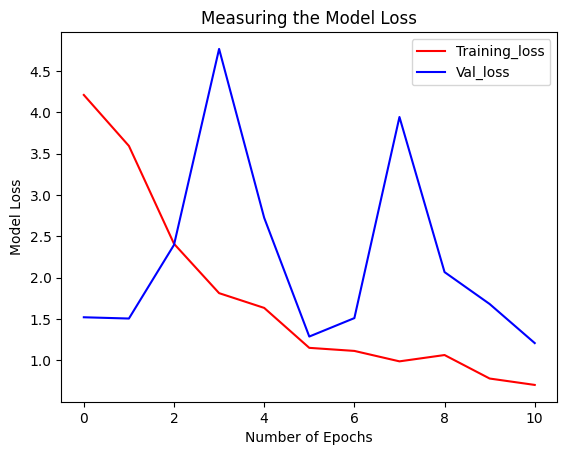

In [ ]:
plt.plot(history.history['loss'],color='r',label='Training_loss')
plt.plot(history.history['val_loss'],color='b',label='Val_loss')
plt.title('Measuring the Model Loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Model Loss')
plt.legend()
plt.show()

##Testing the Model

In [ ]:
test_img = cv2.imread('/content/dataset/test/Asian/as_te14.jpg')

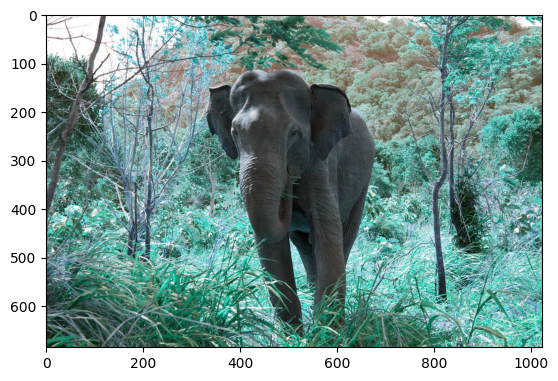

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(685, 1023, 3)

In [ ]:
test_img = cv2.resize(test_img, (256, 256))

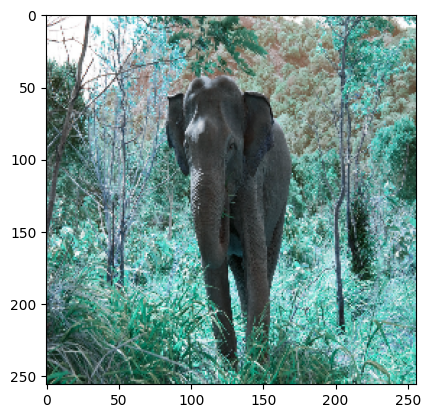

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(256, 256, 3)

In [ ]:
test_input = test_img.reshape(1, 256, 256, 3)

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 18ms/step


array([[1.]], dtype=float32)

In [ ]:
output = model.predict(test_input)[0][0]
print(f'Output is: {output} \n')

if output < 0.5:
  print('This is African')
else:
  print('This is a Asian')

1/1 [==============================] - 0s 17ms/step
Output is: 1.0 

This is a Asian
